# OpenIntro Statistics - Chapter 1 : Introduction to Data (Introduction aux données)
## Titanic Survival Analysis (Titanic dataset)
>**Source**: *OpenIntro Statistics*(4th ed.)<br>
>**Core Principle**:*'Variable type determines analysis method'*<br>
[OpenIntro Ch 1 Theory summary](../references/openintro_ch1_summary_md.md)


In [ ]:
# Data loading and Initial Inspection.
# • Observation = line/ligne/行 (如: 一名乘客--un case)
# • Variable = column/列 (如: age, sex)
# • Categorical: nominal(sex/性别) / ordinal(pclass/舱位)
# • Numerical: discrete(sibsp--only integer-0,4,2) / continuous(age--float--1.5)
# • Response Y = survived | Explanatory X = pclass, sex, age
# Observational studies → Association ≠ Causation (cannot prove that "buying first class resulted in survival"

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load built-in Titanic dataset
df = sns.load_dataset('titanic')

print("*"*70)
print("step 1.Check dataset (dimension, shape)") 
print("*"*70)
print(f"Dimension of titanic dataset: {df.ndim}") # savoi
print(f"Observations of titanic dataset: {df.shape[0]:,} passengrs")
print(f"Variables of titanic dataset: {df.shape[1]:} features")

#create a report(dataframe) for all details of coloumns.
dtype_report = pd.DataFrame({
    'Column': df.columns,
    'Dtype': [df[col].dtype for col in df.columns],
    'Role': ['Response (Y)' if col == 'survived' else 'Explanatory (X)' for col in df.columns],
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Unique Sample (first 5)': [  #based on the unique value to verify the variable type.
        # get the first five unique values.
        ', '.join(
            str(v) for v in df[col].dropna().unique()[:5]
        ) if df[col].notna().any() else '[]'  # null for this column=every row is null for this column.
        for col in df.columns
    ],
    'Missing %': [
        (df[col].isnull().sum() / len(df) * 100).round(1) 
        for col in df.columns
    ]
})
#config report for output.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)
print("\nReport for all the columns")
print(dtype_report.to_string(index=False))
print(f"\nShow the first three lines")
display(df.head(3))

**********************************************************************
step 1.Check dataset (dimension, shape)
**********************************************************************
Dimension of titanic dataset: 2
Observations of titanic dataset: 891 passengrs
Variables of titanic dataset: 15 features

Report for all the columns
     Column    Dtype            Role  Unique Values            Unique Sample (first 5)  Missing %
   survived    int64    Response (Y)              2                               0, 1        0.0
     pclass    int64 Explanatory (X)              3                            3, 1, 2        0.0
        sex   object Explanatory (X)              2                       male, female        0.0
        age  float64 Explanatory (X)             88       22.0, 38.0, 26.0, 35.0, 54.0       19.9
      sibsp    int64 Explanatory (X)              7                      1, 0, 3, 4, 2        0.0
      parch    int64 Explanatory (X)              7                      0, 1, 2,

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [6]:
# OpenIntro Ch 1.2: Variable Type Classification
print("*"*70)
print("STEP 2: Variable Types (classify)")
print("*"*70)
print("OpenIntro Principle: 'Variable type determines analysis method'\n")

#create a new list for the variable type report.
list_numerical_discrete=[]
list_numerical_continuous=[]
list_categorical_binary=[]
list_categorical_nominal=[]
list_categorical_ordinal=[]
for _, row in dtype_report.iterrows():
    col = row['Column']
    dtype = str(row['Dtype'])
    n_unique = row['Unique Values']
    if col in ['survived','sex','adult_male','alive','alone']: # two values for these columns, so they are categorical binary.
        list_categorical_binary.append(col)
    elif col in ['pclass','class']:  # we can compare with their values, so they are categorical-ordinal.
        list_categorical_ordinal.append(col)
    elif col in ['embarked','embark_town','who','deck']: # we cannot compare them, so they are categorical norminal.
        list_categorical_nominal.append(col)
    elif col in ['sibsp','parch']:  # they are integer, so discrete.
        list_numerical_discrete.append(col)
    elif col in ['age','fare']: # they are float, so continuous.
        list_numerical_continuous.append(col)
#create a dictionary for variable classification.
dict_variable_classification = {
    'categorical-binary':list_categorical_binary,
    'categorical-ordinal':list_categorical_ordinal,
    'categorical-nominal':list_categorical_nominal,
    'numerical-discrete':list_numerical_discrete,
    'numerical-continuous':list_numerical_continuous
}
#output the result of classifiation.
print("Variable classification (OpenIntro Statistics Ch 1.2)")
for key, value in dict_variable_classification.items():
    print(f"{key} : {value}")

**********************************************************************
STEP 2: Variable Types (classify)
**********************************************************************
OpenIntro Principle: 'Variable type determines analysis method'

Variable classification (OpenIntro Statistics Ch 1.2)
categorical-binary : ['survived', 'sex', 'adult_male', 'alive', 'alone']
categorical-ordinal : ['pclass', 'class']
categorical-nominal : ['embarked', 'who', 'deck', 'embark_town']
numerical-discrete : ['sibsp', 'parch']
numerical-continuous : ['age', 'fare']


**********************************************************************
STEP 3: Visualization of row and line
**********************************************************************


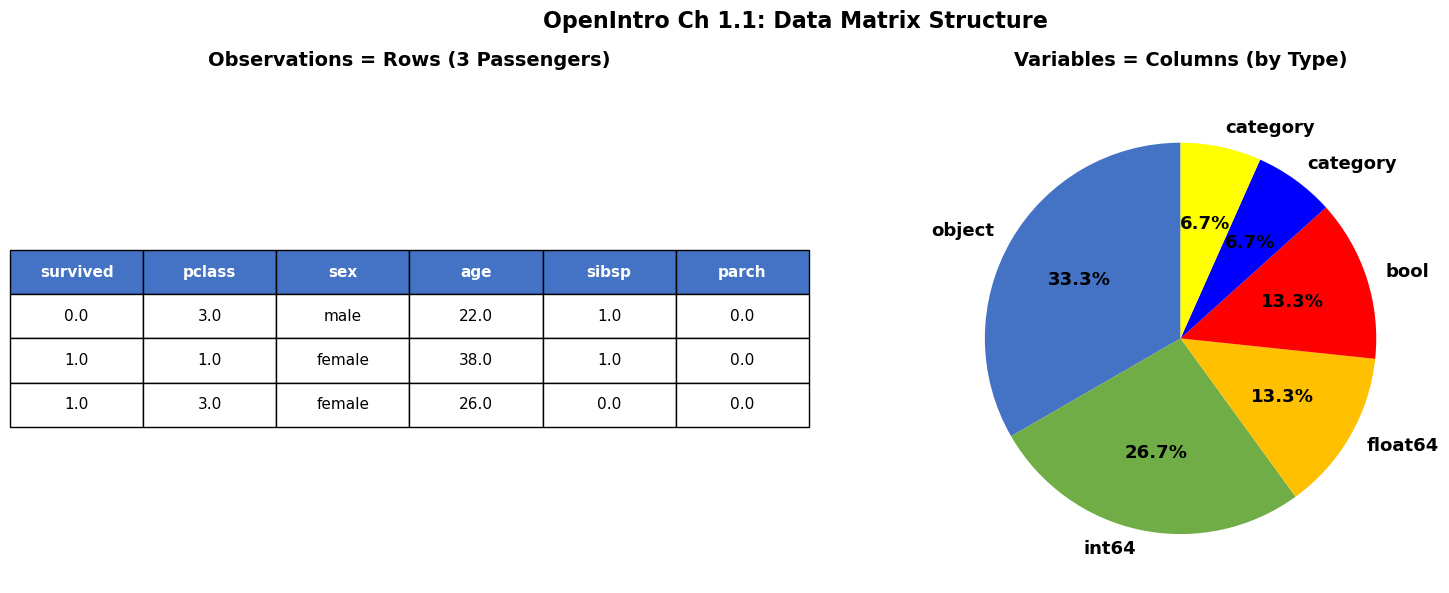


Key Takeaway:
  • Each ROW = One observation (one passenger)
  • Each COLUMN = One variable (one characteristic)
  • Analysis starts with understanding this structure!


In [28]:
# OpenIntro Ch 1.1: Observations vs Variables Visualization (FIXED)
print("*"*70)
print("STEP 3: Visualization of row and line")
print("*"*70)
#Create one screen (fig) with 2 windows (axes)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
#filter = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch']
# Using this filter, we get a subset of the first three rows.
sample_passengers = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch']].head(3)

#convert all data type to string, the goal is for the table in axes[0]
cell_text = []
for _, row in sample_passengers.iterrows():
    formatted_row = []
    # treate every column in a row --convert to string.
    for col in sample_passengers.columns:
        val = row[col]
        # when numeric, covert numberic to string with one decimal=round(val, 1)
        if pd.api.types.is_numeric_dtype(sample_passengers[col]):
            formatted_row.append(f"{val:.1f}") # val:.1f = round(val,1)
        # when other type (bool,object.category), directly convert to string.
        else:
            formatted_row.append(str(val))
    #keep all the values of one row into cell_text.
    cell_text.append(formatted_row)

# for the first axes. the left image.
axes[0].axis('tight')
axes[0].axis('off')
table = axes[0].table(
    cellText=cell_text,  #the goal for convert all data type to string
    colLabels=sample_passengers.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)
for i in range(len(sample_passengers.columns)):
    table[(0, i)].set_facecolor('#4472C4')
    table[(0, i)].set_text_props(weight='bold', color='white')
axes[0].set_title('Observations = Rows (3 Passengers)', 
                  fontsize=14, fontweight='bold', pad=20)

# for the right image. Distribution of variable types
type_counts = dtype_report['Dtype'].value_counts()
colors = ['#4472C4', '#70AD47', '#FFC000','red','blue','yellow']
axes[1].pie(
    type_counts.values, 
    labels=type_counts.index, 
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 13, 'weight': 'bold'}
)
axes[1].set_title('Variables = Columns (by Type)', 
                  fontsize=14, fontweight='bold', pad=20)

plt.suptitle('OpenIntro Ch 1.1: Data Matrix Structure', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
#plt.savefig('reports/figures/ch1_observations_vs_variables.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Takeaway:")
print("  • Each ROW = One observation (one passenger)")
print("  • Each COLUMN = One variable (one characteristic)")
print("  • Analysis starts with understanding this structure!")
